# Query for icSrc Sources Results in NON OGA

 work with Weakly_2022_39
- use jupyter kernel LSST


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2022/10/31
- update : 2022/10/31


In [1]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/home/d/dagoret/repos/repos_w_2022_39/atmospec 	setup
drp_pipe              LOCAL:/home/d/dagoret/repos/repos_w_2022_39/drp_pipe 	setup
eups                  LOCAL:/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.1.0/eups 	setup
summit_utils          LOCAL:/home/d/dagoret/repos/repos_w_2022_39/summit_utils 	setup


In [2]:
! eups list -s lsst_distrib

   g0b29ad24fb+a10408d0bf 	current w_2022_39 setup


In [3]:
import lsst.daf.butler as dafButler
import lsst.summit.utils.butlerUtils as butlerUtils

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [5]:
repo =  "/sdf/group/rubin/repo/main"
#repo = "/sdf/group/rubin/repo/oga/"
butler = dafButler.Butler(repo)
registry = butler.registry

## Give the collection

In [6]:
my_collection = "u/dagoret/spectro/noflat/empty~holo4/20211103"

In [7]:
#butler = butlerUtils.makeDefaultLatissButler(extraCollections=[my_collection])

## Config

In [8]:
# path index for each month
DATE="20211103"
filterdispersername = "empty~holo4_003"
#filterdispersername = "BG40~holo4_003"
#filterdispersername = "FELH0600~holo4_003"

- icSrc_schema
- icExp  
- icExpBackground  
- icSrc

In [9]:
datasetRefs = registry.queryDatasets(datasetType='icSrc_schema', collections=my_collection, where= "instrument='LATISS'")
#icSrc_schema = butler.get('icSrc_schema')

## icExp

In [10]:
datasetRefs = registry.queryDatasets(datasetType='icExp', collections=my_collection, where= "instrument='LATISS'")

In [11]:
all_ref_for_icSrc = []
all_dataId = []
all_icExp  = []
all_exposures = []



for i, ref in enumerate(datasetRefs):
    all_ref_for_icSrc.append(ref.dataId)
    print("========================datasetType = icExp ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    icExp = butler.get('icExp', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_icExp.append(icExp)
    if i > 5:
        break

========================datasetType = icExp ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2021110300459}
visit...................: 2021110300459
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/spectro/noflat/empty~holo4/20211103/20221031T154824Z
{'day_obs': 20211103, 'seq_num': 459, 'detector': 0}
========================datasetType = icExp ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2021110300465}
visit...................: 2021110300465
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/spectro/noflat/empty~holo4/20211103/20221031T155742Z
{'day_obs': 20211103, 'seq_num': 465, 'detector': 0}
========================datasetType = ic

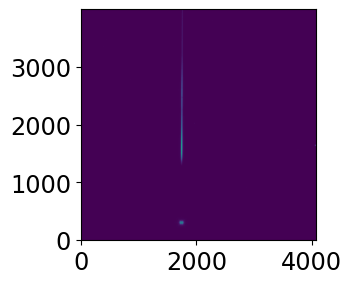

In [12]:
plt.imshow(icExp.getImage().array,origin="lower")

## icExpBackground

In [13]:
datasetRefs = registry.queryDatasets(datasetType='icExpBackground', collections=my_collection, where= "instrument='LATISS'")

In [14]:
all_ref_for_icExpBg  = []
all_dataId = []
all_icExpBg  = []
all_exposures = []



for i, ref in enumerate(datasetRefs):
    all_ref_for_icSrc.append(ref.dataId)
    print("========================datasetType = icExpBackground ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    icExpBg = butler.get('icExpBackground', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_ref_for_icExpBg.append(icExpBg) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_icExpBg.append(icExpBg)
    if i > 5:
        break

========================datasetType = icExpBackground ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2021110300459}
visit...................: 2021110300459
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/spectro/noflat/empty~holo4/20211103/20221031T154824Z
{'day_obs': 20211103, 'seq_num': 459, 'detector': 0}
========================datasetType = icExpBackground ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2021110300465}
visit...................: 2021110300465
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/spectro/noflat/empty~holo4/20211103/20221031T155742Z
{'day_obs': 20211103, 'seq_num': 465, 'detector': 0}
====================

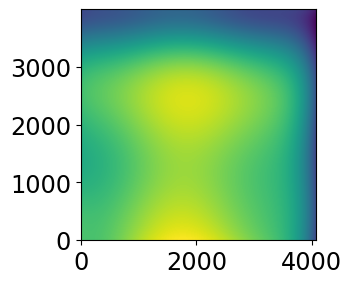

In [15]:
plt.imshow(icExpBg.getImage().array,origin="lower")

## icSrc

In [16]:
datasetRefs = registry.queryDatasets(datasetType='icSrc', collections=my_collection, where= "instrument='LATISS'")

In [17]:
datasetRefs.any() 

True

In [18]:
all_ref_for_icSrc = []
all_dataId = []
all_icSrc = []
all_exposures = []



for i, ref in enumerate(datasetRefs):
    all_ref_for_icSrc.append(ref.dataId)
    print("========================datasetType = icSrc ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    icSrc = butler.get('icSrc', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_ref_for_icSrc.append(icSrc) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_icSrc.append(icSrc)
    if i > 5:
        break

========================datasetType = icSrc ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2021110300459}
visit...................: 2021110300459
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/spectro/noflat/empty~holo4/20211103/20221031T154824Z
{'day_obs': 20211103, 'seq_num': 459, 'detector': 0}
========================datasetType = icSrc ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2021110300465}
visit...................: 2021110300465
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/spectro/noflat/empty~holo4/20211103/20221031T155742Z
{'day_obs': 20211103, 'seq_num': 465, 'detector': 0}
========================datasetType = ic

In [19]:
table_sources = icSrc.asAstropy()
table_sources

id,coord_ra,coord_dec,parent,calib_psf_candidate,calib_psf_used,calib_psf_reserved,base_SdssCentroid_x,slot_Centroid_x,base_SdssCentroid_y,slot_Centroid_y,base_SdssCentroid_xErr,slot_Centroid_xErr,base_SdssCentroid_yErr,slot_Centroid_yErr,base_SdssCentroid_flag,base_CircularApertureFlux_flag_badCentroid,base_GaussianFlux_flag_badCentroid,base_PsfFlux_flag_badCentroid,ext_shapeHSM_HsmSourceMoments_flag_badCentroid,slot_Centroid_flag,base_SdssCentroid_flag_edge,base_CircularApertureFlux_flag_badCentroid_edge,base_GaussianFlux_flag_badCentroid_edge,base_PsfFlux_flag_badCentroid_edge,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_edge,slot_Centroid_flag_edge,base_SdssCentroid_flag_noSecondDerivative,base_CircularApertureFlux_flag_badCentroid_noSecondDerivative,base_GaussianFlux_flag_badCentroid_noSecondDerivative,base_PsfFlux_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_noSecondDerivative,slot_Centroid_flag_noSecondDerivative,base_SdssCentroid_flag_almostNoSecondDerivative,base_CircularApertureFlux_flag_badCentroid_almostNoSecondDerivative,base_GaussianFlux_flag_badCentroid_almostNoSecondDerivative,base_PsfFlux_flag_badCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_almostNoSecondDerivative,slot_Centroid_flag_almostNoSecondDerivative,base_SdssCentroid_flag_notAtMaximum,base_CircularApertureFlux_flag_badCentroid_notAtMaximum,base_GaussianFlux_flag_badCentroid_notAtMaximum,base_PsfFlux_flag_badCentroid_notAtMaximum,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_notAtMaximum,slot_Centroid_flag_notAtMaximum,base_SdssCentroid_flag_resetToPeak,base_CircularApertureFlux_flag_badCentroid_resetToPeak,base_GaussianFlux_flag_badCentroid_resetToPeak,base_PsfFlux_flag_badCentroid_resetToPeak,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_resetToPeak,slot_Centroid_flag_resetToPeak,base_SdssCentroid_flag_badError,base_CircularApertureFlux_flag_badCentroid_badError,base_GaussianFlux_flag_badCentroid_badError,base_PsfFlux_flag_badCentroid_badError,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_badError,slot_Centroid_flag_badError,base_FPPosition_x,base_FPPosition_y,base_FPPosition_flag,base_FPPosition_missingDetector_flag,base_Jacobian_value,base_Jacobian_flag,ext_shapeHSM_HsmSourceMoments_x,slot_Shape_x,ext_shapeHSM_HsmSourceMoments_y,slot_Shape_y,ext_shapeHSM_HsmSourceMoments_xx,slot_Shape_xx,ext_shapeHSM_HsmSourceMoments_yy,slot_Shape_yy,ext_shapeHSM_HsmSourceMoments_xy,slot_Shape_xy,ext_shapeHSM_HsmSourceMoments_flag,base_GaussianFlux_flag_badShape,slot_Shape_flag,ext_shapeHSM_HsmSourceMoments_flag_no_pixels,base_GaussianFlux_flag_badShape_no_pixels,slot_Shape_flag_no_pixels,ext_shapeHSM_HsmSourceMoments_flag_not_contained,base_GaussianFlux_flag_badShape_not_contained,slot_Shape_flag_not_contained,ext_shapeHSM_HsmSourceMoments_flag_parent_source,base_GaussianFlux_flag_badShape_parent_source,slot_Shape_flag_parent_source,ext_shapeHSM_HsmSourceMoments_flag_galsim,base_GaussianFlux_flag_badShape_galsim,slot_Shape_flag_galsim,ext_shapeHSM_HsmSourceMoments_flag_edge,base_GaussianFlux_flag_badShape_edge,slot_Shape_flag_edge,base_CircularApertureFlux_3_0_instFlux,base_CircularApertureFlux_3_0_instFluxErr,base_CircularApertureFlux_3_0_flag,base_CircularApertureFlux_3_0_flag_apertureTruncated,base_CircularApertureFlux_3_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_4_5_instFlux,base_CircularApertureFlux_4_5_instFluxErr,base_CircularApertureFlux_4_5_flag,base_CircularApertureFlux_4_5_flag_apertureTruncated,base_CircularApertureFlux_4_5_flag_sincCoeffsTruncated,base_CircularApertureFlux_6_0_instFlux,base_CircularApertureFlux_6_0_instFluxErr,base_CircularApertureFlux_6_0_flag,base_CircularApertureFlux_6_0_flag_apertureTruncated,base_CircularApertureFlux_6_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_9_0_instFlux,base_CircularApertureFlux_9_0_instFluxErr,base_CircularApertureFlux_9_0_flag,base_CircularApertureFlux_9_0_flag_apertureTruncated,base_CircularApertureFlux_9_0_f

## src

In [20]:
datasetRefs = butler.registry.queryDatasets(datasetType='src', collections=my_collection, where= "instrument='LATISS'")

In [21]:
all_ref_for_src = []
all_dataId = []
all_src = []
all_exposures = []

for i, ref in enumerate(datasetRefs):
    all_ref_for_src.append(ref.dataId)
    print("========================datasetType = src ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    src = butler.get('src', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_ref_for_src.append(src) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_src.append(src)
    if i > 5:
        break

In [22]:
datasetRefs.any()

False

# CharacterizeImage

- characterizeImage_config
- characterizeImage_metadata
- characterizeImage_log 

## characterizeImage_config

In [23]:
datasetRefs = registry.queryDatasets(datasetType='characterizeImage_config', collections=my_collection, where= "instrument='LATISS'")
#conf = butler.get('characterizeImage_config')

In [24]:
for i, ref in enumerate(datasetRefs):
    print("========================datasetType = characterizeImage_config ============================================")
    print("fullId..................:",ref.dataId.full)
    cf = butler.get('characterizeImage_config', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    if i > 2:
        break

========================datasetType = characterizeImage_config ============================================
fullId..................: {}
========================datasetType = characterizeImage_config ============================================
fullId..................: {}
========================datasetType = characterizeImage_config ============================================
fullId..................: {}
========================datasetType = characterizeImage_config ============================================
fullId..................: {}


In [25]:
cf.toDict()

{'saveMetadata': True,
 'saveLogOutput': True,
 'doMeasurePsf': False,
 'doWrite': True,
 'doWriteExposure': True,
 'psfIterations': 2,
 'background': {'statisticsProperty': 'MEANCLIP',
  'undersampleStyle': 'REDUCE_INTERP_ORDER',
  'binSize': 128,
  'binSizeX': 0,
  'binSizeY': 0,
  'algorithm': 'AKIMA_SPLINE',
  'ignoredPixelMask': ['BAD',
   'EDGE',
   'DETECTED',
   'DETECTED_NEGATIVE',
   'NO_DATA'],
  'isNanSafe': False,
  'useApprox': True,
  'approxOrderX': 6,
  'approxOrderY': -1,
  'weighting': True},
 'detection': {'minPixels': 1,
  'isotropicGrow': True,
  'combinedGrow': True,
  'nSigmaToGrow': 2.4,
  'returnOriginalFootprints': False,
  'thresholdValue': 5.0,
  'includeThresholdMultiplier': 3.0,
  'thresholdType': 'pixel_stdev',
  'thresholdPolarity': 'positive',
  'adjustBackground': 0.0,
  'reEstimateBackground': True,
  'background': {'statisticsProperty': 'MEANCLIP',
   'undersampleStyle': 'REDUCE_INTERP_ORDER',
   'binSize': 128,
   'binSizeX': 0,
   'binSizeY': 0,
 

## characterizeImage_metadata

In [26]:
datasetRefs = registry.queryDatasets(datasetType='characterizeImage_metadata', collections=my_collection, where= "instrument='LATISS'")

In [27]:
for i, ref in enumerate(datasetRefs):
    print("========================datasetType = characterizeImage_metadata ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    md = butler.get('characterizeImage_metadata', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    
    if i > 2:
        break

========================datasetType = characterizeImage_metadata ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2021110300459}
visit...................: 2021110300459
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/spectro/noflat/empty~holo4/20211103/20221031T154824Z
{'day_obs': 20211103, 'seq_num': 459, 'detector': 0}
========================datasetType = characterizeImage_metadata ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2021110300465}
visit...................: 2021110300465
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/spectro/noflat/empty~holo4/20211103/20221031T155742Z
{'day_obs': 20211103, 'seq_num': 465, 'detector': 0

In [28]:
md.toDict()

{'characterizeImage:detection:tempLocalBackground': {},
 'characterizeImage:measurePsf:reserve': {},
 'characterizeImage:repair:interp': {},
 'characterizeImage:catalogCalculation': {'runStartInvoluntaryContextSwitches': 7,
  'runEndMaxResidentSetSize': 911097856,
  'runStartVoluntaryContextSwitches': 73,
  'runEndSystemTime': 0.205293,
  'runStartBlockInputs': 0,
  'runStartMaxResidentSetSize': 911097856,
  'runStartUserTime': 5.844931,
  'runStartSystemTime': 0.205293,
  'runEndUtc': '2022-10-31T16:16:54.272762',
  'runStartBlockOutputs': 32,
  'runEndVoluntaryContextSwitches': 73,
  'runEndInvoluntaryContextSwitches': 7,
  'runEndBlockOutputs': 32,
  'runEndUserTime': 5.846916,
  'runEndMajorPageFaults': 0,
  'runEndMinorPageFaults': 36913,
  'runEndCpuTime': 6.052211304,
  'runEndBlockInputs': 0,
  '__version__': 1,
  'runStartUtc': '2022-10-31T16:16:54.270771',
  'runStartMajorPageFaults': 0,
  'runStartCpuTime': 6.050225942,
  'runStartMinorPageFaults': 36892},
 'characterizeImag

## characterizeImage_log

In [29]:
datasetRefs = registry.queryDatasets(datasetType='characterizeImage_log', collections=my_collection, where= "instrument='LATISS'")

In [30]:
for i, ref in enumerate(datasetRefs):
    print("========================datasetType = characterizeImage_metadata ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    log = butler.get('characterizeImage_log', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    
    if i > 5:
        break

========================datasetType = characterizeImage_metadata ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2021110300459}
visit...................: 2021110300459
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/spectro/noflat/empty~holo4/20211103/20221031T154824Z
{'day_obs': 20211103, 'seq_num': 459, 'detector': 0}
========================datasetType = characterizeImage_metadata ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2021110300465}
visit...................: 2021110300465
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/spectro/noflat/empty~holo4/20211103/20221031T155742Z
{'day_obs': 20211103, 'seq_num': 465, 'detector': 0

In [31]:
print(log)

INFO 2022-10-31T16:43:39.775565+00:00 lsst.characterizeImage characterizeImage.py:382 - CharacterizeImageTask initialized with 'simple' PSF.
INFO 2022-10-31T16:43:42.263061+00:00 lsst.characterizeImage.detection detection.py:598 - Detected 809 positive peaks in 120 footprints and 285 negative peaks in 9 footprints to 15 sigma
INFO 2022-10-31T16:43:42.700688+00:00 lsst.characterizeImage.detection detection.py:622 - Resubtracting the background after object detection
INFO 2022-10-31T16:43:43.369651+00:00 lsst.characterizeImage.measurement sfm.py:298 - Measuring 120 sources (120 parents, 0 children) 
INFO 2022-10-31T16:43:44.090965+00:00 lsst.characterizeImage characterizeImage.py:405 - iter 1; PSF sigma=2.00, dimensions=(81, 81); median background=42.58
INFO 2022-10-31T16:43:44.617131+00:00 lsst.characterizeImage.measurement sfm.py:298 - Measuring 120 sources (120 parents, 0 children) 
INFO 2022-10-31T16:43:47.822671+00:00 lsst.ctrl.mpexec.singleQuantumExecutor singleQuantumExecutor.py:2